# Polynomial Regression sklearn Diabetes datasets

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

In [2]:
#load dataset
diabetes = load_diabetes()
#print (diabetes)

#collect features (X) and labels or target (y) from the data
X = diabetes['data']
y = diabetes['target']

#show the data shape for array size
print (X.shape, y.shape)

(442, 10) (442,)


In [3]:
#Note that X has 442 rows and 10 columns, and y has 442 rows and one column

In [4]:
#construct a dataframe using X data
df = pd.DataFrame(X, columns=["age","sex","bmi","bp", "tc", "ldl", "hdl","tch", "ltg", "glu"])
#show the data
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
#now pick the target and add to the dataframe
df['progression'] = diabetes['target']

In [6]:
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
#now look for datagaps
#how many data points have zeros, NaN.
df.isnull().sum()

age            0
sex            0
bmi            0
bp             0
tc             0
ldl            0
hdl            0
tch            0
ltg            0
glu            0
progression    0
dtype: int64

In [8]:
#Now check the statistics
df.describe()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-1.444295e-18,2.543215e-18,-2.255925e-16,-4.854086e-17,-1.428596e-17,3.898811e-17,-6.028360e-18,-1.788100e-17,9.243486e-17,1.351770e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [9]:
#Now plot the correlation matrix. Is the data co-related?

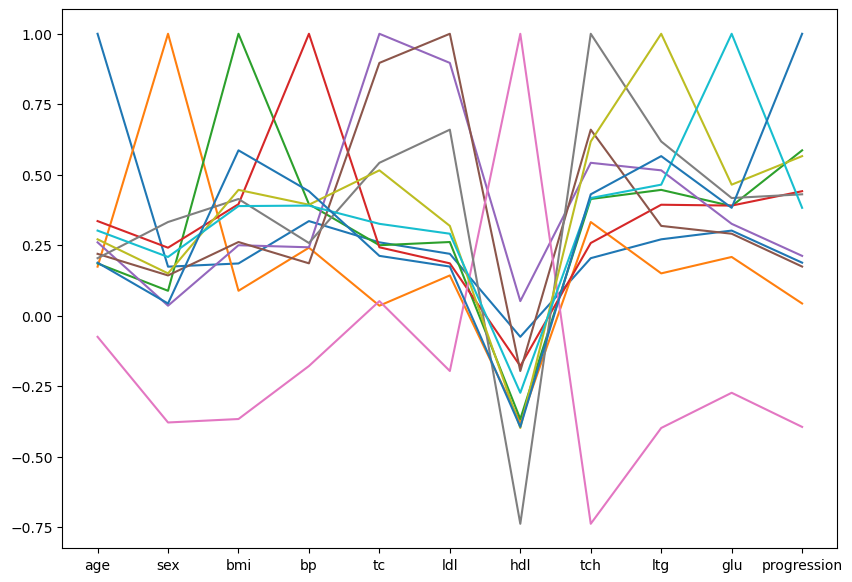

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
dataplt = plt.plot(df.corr())

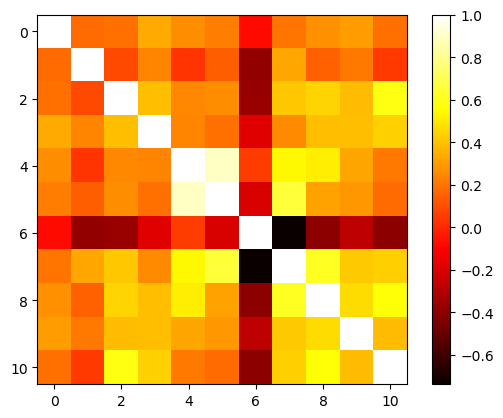

In [11]:
#heatmap with matplotlib
import matplotlib.cm as cmap
plt.imshow(df.corr(),cmap=cmap.hot)
plt.colorbar()
plt.show()

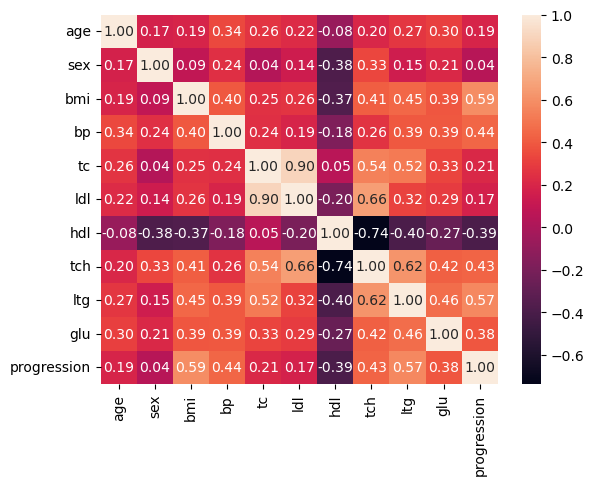

In [12]:
#plot with seaborn
#!pip install seaborn
import seaborn as sbn
dataplot = sbn.heatmap(df.corr(), annot=True, fmt='0.2f')

<Figure size 1000x700 with 0 Axes>

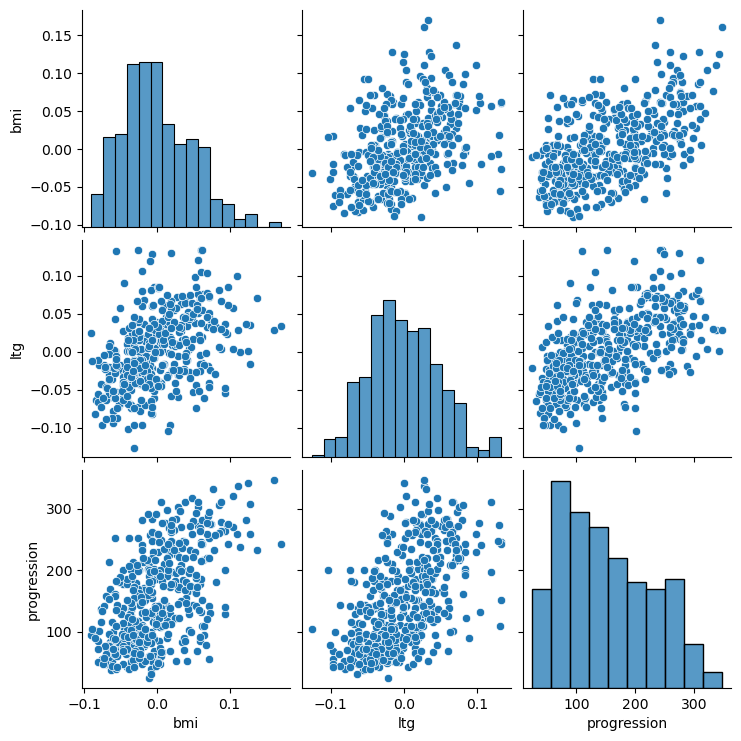

In [13]:
#heatmap doesn't show a big correlation between target/label and features
#check ltg, bmi with progression
plt.figure(figsize=(10,7))
sbn.pairplot(df[['bmi','ltg','progression']])

Text(0, 0.5, 'Progression')

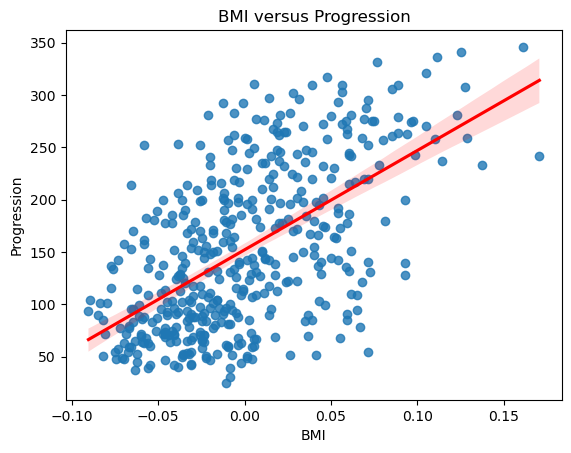

In [14]:
#BMI vs progression 
sbn.regplot(data=df, x='bmi', y='progression', line_kws={"color": "red"})
plt.title("BMI versus Progression")
plt.xlabel('BMI')
plt.ylabel('Progression')

In [15]:
#Reference: https://towardsdatascience.com/predicting-diabetes-with-machine-learning-part-i-f151cb764aee

# Polynomial Regresssion for the diabetes dataset

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

#transform values of all X
poly_features = poly.fit_transform(X)

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(poly_features, y,
                                                   test_size=0.4,
                                                   random_state=42)

In [17]:
# create 2nd order polyreg 
poly_reg = LinearRegression()

#fit
poly_reg.fit(X_train, y_train)

#prediction
y_test_pred = poly_reg.predict(X_test)
y_train_pred = poly_reg.predict(X_train)

In [18]:
#Generate metrics. Coeff of determination is how well independent variable predicts dependent variable
from sklearn import metrics
print (f'train set coefficient of determination:{poly_reg.score(X_train, y_train): .2f}')
print (f'test set coff of determination: {poly_reg.score(X_test, y_test): .2f}')

train set coefficient of determination: 0.61
test set coff of determination:  0.42


In [19]:
#find absolute and MSE 
print (f' mean absolute error: {metrics.mean_absolute_error(y_test, y_test_pred): .2f}')
print (f' mean squared error: {metrics.mean_squared_error(y_test, y_test_pred): .2f}')

 mean absolute error:  47.18
 mean squared error:  3383.68


In [20]:
#RMSE
import math
print (f' root mean squared error: {math.sqrt(metrics.mean_squared_error(y_test, y_test_pred)): .2f}')

 root mean squared error:  58.17


In [21]:
#Note: RMSE < 0.5 is considered good for prediction

# LogisticRegression 

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)
model_score = log_model.score(X_test, y_test) #accuracy of the model
print ("Logistic Regression Accuracy:", model_score)
print ("Logestic Regression predicted set", y_pred)
print ("Actual Values ", y_test)
#Functional Data from fitting 
#log_model.intercept_
#log_model.coef_


Logistic Regression Accuracy: 0.009009009009009009
Logestic Regression predicted set [200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.]
Actual Values  [179. 168. 281.  60. 186. 258. 317. 140. 152. 134. 115. 164.  72. 128.
 129. 281. 199. 197. 275.  60. 232.  84. 173.  83. 162. 172. 245.  44.
 202. 104. 168. 178. 141. 103.  59. 274. 185.  90.  72. 281. 154.  64.
 253. 242. 252.  47. 108. 346. 190. 137. 118.  25.  54.  51.  59.  67.
  71.  91. 184. 110. 111.  80.  45. 263. 180.  79.  